<a href="https://colab.research.google.com/github/de-pesh/ML/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

In [2]:
# Loading and Preprocessing Image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess image for VGG16
    return img_array

In [6]:
# Mounting drive for Image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Loading an image for segmentation
image_path = '/content/drive/My Drive/cars.png'
img = load_and_preprocess_image(image_path)

In [12]:
# Extract Features using VGG16 (remove the last fully connected layers)
vgg_model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
# Extract features from the image
features = vgg_model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


In [17]:
# Reshape the features to be a 2D array (for K-Means input)
features_reshaped = features.reshape(-1, features.shape[-1])

In [19]:
# Apply K-Means Clustering for Segmentation
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_reshaped)

KMeans(n_clusters=3, random_state=42)

In [20]:
# Get the cluster labels
cluster_labels = kmeans.predict(features_reshaped)

In [21]:
# Reshape the cluster labels back to the image shape
segmented_image = cluster_labels.reshape(features.shape[1], features.shape[2])

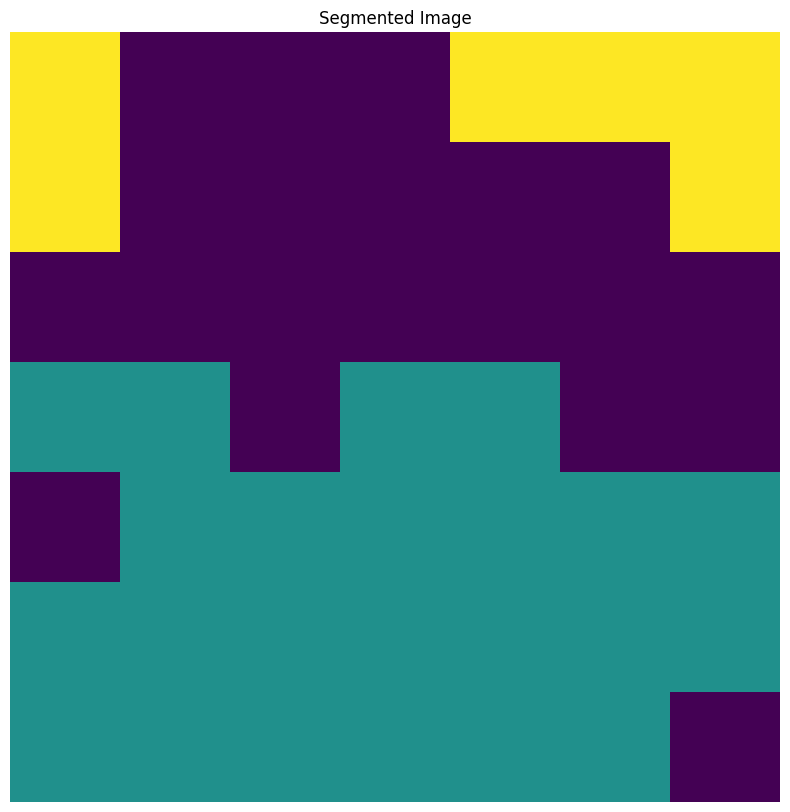

In [24]:
# Visualize the Segmented Image
plt.figure(figsize=(10, 10))
plt.imshow(segmented_image)
plt.title("Segmented Image")
plt.axis('off')
plt.show()